# Plot de Batimentos Cardíacos

In [3]:
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

RAW_DATA = os.environ.get("RAW_DATA")
PROCESSED_DATA = os.environ.get("PROCESSED_DATA")
ROOT_PATH = os.environ.get("ROOT_PATH")


In [4]:
import pandas as pd
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [5]:
file = 'PN00-1'

In [6]:
com_crise = loadmat(f'/mnt/c/Users/davi.nascimento/Documents/siena_eeg_ecg/data/processed/ecg_segments/com_crise/{file}.mat')['QRS_com_crise']

sem_crise = loadmat(f'/mnt/c/Users/davi.nascimento/Documents/siena_eeg_ecg/data/processed/ecg_segments/sem_crise/{file}.mat')['QRS_sem_crise']

Text(0.5, 0.98, 'PN00-1')

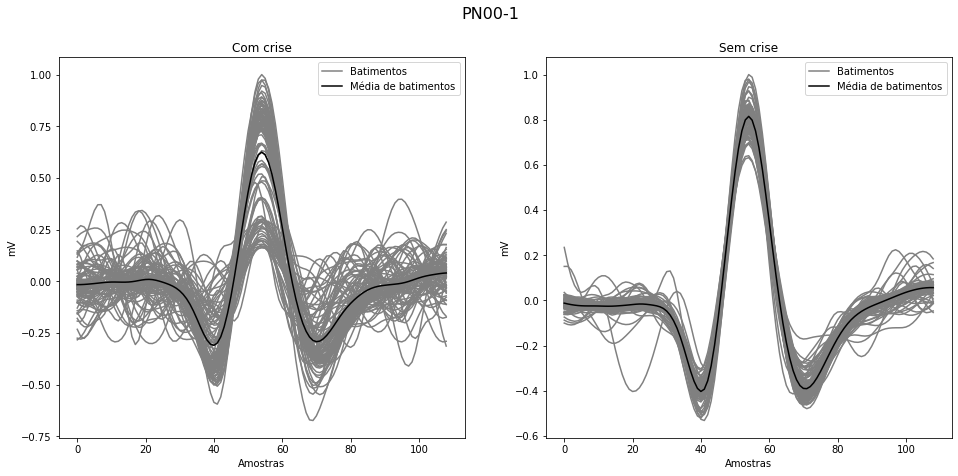

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

cont1 = 0

for i in range(com_crise.shape[1]):
    if cont1 == 0:
        line_legend = 'Batimentos'
    else:
        line_legend = None
    axs[0].plot(com_crise[:,i], color='gray', label=line_legend)
    cont1+=1

axs[0].plot(com_crise.mean(axis=1), color='black', label='Média de batimentos')


axs[0].set_ylabel('mV')
axs[0].set_xlabel('Amostras')
axs[0].set_title("Com crise")
axs[0].legend()

cont2 = 0

for i in range(sem_crise.shape[1]):
    if cont2 == 0:
        line_legend = 'Batimentos'
    else:
        line_legend = None
    axs[1].plot(sem_crise[:,i], color='gray', label=line_legend)
    cont2+=1

axs[1].plot(sem_crise.mean(axis=1), color='black', label='Média de batimentos')


axs[1].set_ylabel('mV')
axs[1].set_xlabel('Amostras')
axs[1].set_title("Sem crise")
axs[1].legend()


fig.suptitle(file, fontsize=16)


In [47]:
fig.savefig(f"{ROOT_PATH}reports/figures/batimentos/{file}.jpg")